# Modelling Stellar Interiors: Jupyter Notebook




In [1]:
#import appropriate packages
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Part 1

Lane emden equation: $$\frac{d^2\theta}{d\xi^2} = -[\frac{2}{\xi}\frac{d\theta}{d\xi}] - \theta^n $$

In [2]:
#set up function which can solve the lame emden equation for any value of 'n'.
def solve(n):
    """Solves the Lame-Emdem equation for any value of n.
    
    args: n
    """
    #create empty lists for theta and xi values to store them into
    theta_values = []
    xi_values = []
    
    #define values of xi, delta xi, the gradient and theta
    xi = 0.00001
    d_xi = 0.001
    dtheta = 0
    theta = 1
    
    #create a variable to store xi
    xi_now = xi
    
    #use while loop to find theta and xi values until theta=0
    while (theta >= 0) and (xi_now < 30):
        
        #increase xi value by small amount
        xi_now = xi_now + d_xi
    
        #calculate values after small increase in xi
        dtheta_next = dtheta - (((2/xi_now)*dtheta)+theta**n)*d_xi
        theta_next = theta + dtheta_next*d_xi

        #update the old values to be the new ones
        dtheta = dtheta_next
        theta  = theta_next
        
        #store these values in list
        theta_values.append(theta)
        xi_values.append(xi_now)
    
    #convert lists to arrays to make it easier to deal with
    xi_values = np.array(xi_values)
    theta_values = np.array(theta_values)
    return (xi_values, theta_values)

#call the function to find the theata and xi values for each n
xi_4, theta_4 = solve(4)

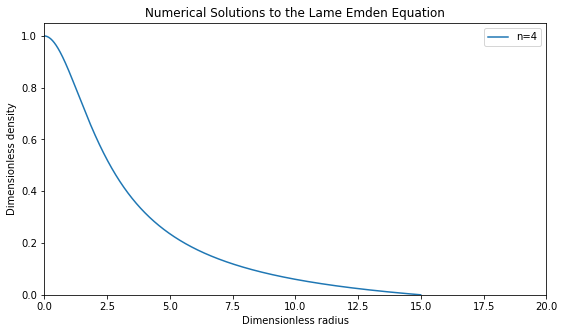

In [3]:
#plot the values of xi vs theta for each n value
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(xi_4, theta_4, label = 'n=4')
#set limits on the axes
axis.set_ylim(0)
axis.set_xlim(0, 20)
#give title and axes labels
axis.set_title('Numerical Solutions to the Lame Emden Equation')
axis.set_ylabel('Dimensionless density')
axis.set_xlabel('Dimensionless radius')
#add a legend
axis.legend()
#show
plt.show()

In [4]:
#find the intercept of each plot, by using slicing to find the last known value of xi which is the intercept (theta =0)
print ('Values of xi at theta = 0 for various n are as follows')
int_4 = xi_4[-1]
print ('n=4:', '%.3f' %int_4)

Values of xi at theta = 0 for various n are as follows
n=4: 14.993


## Part 2

### Standard Solar Model

#### Alpha:
$$ \alpha = \frac{R}{\xi_R} $$

In [5]:
#radius of the sun (known)
#R = 6.957e8
R=12.
#find the value of alpha for each n
alpha_4 = R/int_4

#### Radius:
$$ r = \alpha\xi $$

In [6]:
#find array of radius values for each n
r_4 = (xi_4*alpha_4)
#check
print(r_4)

[8.08376704e-04 1.60874968e-03 2.40912265e-03 ... 1.19983993e+01
 1.19991996e+01 1.20000000e+01]


### Density



Central Density: $$ \frac{3M_o}{4\pi r_o^3} = -3\rho_c|\frac{1}{\xi}\frac{d\theta}{d\xi}|  $$

$$ \rho_c = -\frac{M_o\xi}{4\pi r_o^3}\frac{d\xi}{d\theta} $$

Density: $$\rho = \rho_c\theta^n $$

Log Density: $$log(\rho) = log(\rho_c\theta^n) $$

In [7]:
#set up function to find the gradient for any value of n.
def gradient(n):
    """Finds the gradient (dtheta/dxi) for any value of n.
    
    args: n
    """
    #create empty lists for theta, xi and dtheta values to store them into
    theta_values = []
    xi_values = []
    dtheta_values = []
    
    #define values of xi, delta xi, the gradient and theta
    xi = 0.00001
    d_xi = 0.001
    dtheta = 0
    theta = 1
    
    #create a variable to store xi
    xi_now = xi
    
    #use while loop to find theta and xi values until theta=0
    while (theta >= 0) and (xi_now < 20):
        
        #increase xi value by small amount
        xi_now = xi_now + d_xi
    
        #calculate values after small increase in xi
        dtheta_next = dtheta - (((2/xi_now)*dtheta)+theta**n)*d_xi
        theta_next = theta + dtheta_next*d_xi

        #update the old values to be the new ones
        dtheta = dtheta_next
        theta  = theta_next
        
        #store these values in list
        theta_values.append(theta)
        xi_values.append(xi_now)
        dtheta_values.append(dtheta)
    
    #convert lists to arrays to make it easier to deal with
    xi_values = np.array(xi_values)
    theta_values = np.array(theta_values)
    dtheta_values = np.array(dtheta_values)
    return (dtheta_values)

#calculate gradient by calling this function for each value of n.
dtheta_4 = gradient(4)

In [8]:
#Mass of the sun (known)
#M_sun = 1.989e30
M_sun=1e10
#Find the gradient (dtheta/dxi) at the surface of the sun for each n
dtheta_R_4 = dtheta_4[-1]

#find the central density of the sun for each n using the equation stated above
rho_c_4 = -M_sun*int_4/(4*np.pi*R**3*dtheta_R_4)

#find array of density values for each value of n using the equation stated above
rho_4 = rho_c_4*theta_4**4

#log these density values to make the plot of the results more readable
log_rho_4 = np.log10(rho_4)


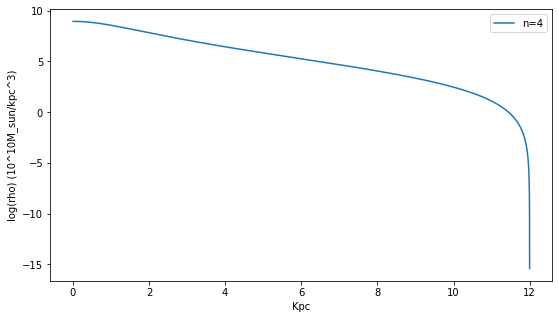

In [12]:
#plot the log of density against radius for each n
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(r_4, log_rho_4, label = 'n=4')
#axis.set_ylim(-30, -15)
#axis.set_xlim(0,1)
axis.set_ylabel('log(rho) (10^10M_sun/kpc^3)')
axis.set_xlabel('Kpc')
axis.legend()
plt.show()

In [10]:
path="/Users/namh2/Downloads/anterior/ajusteTOV/"
data=np.loadtxt(path+"datos.txt")

In [11]:
RCr_data = np.array([row[1] for row in data])# galactocentric distance [kpc]
RCv_data = np.array([row[5] for row in data])# rotation velocity [km/s]
RCev_data = np.array([row[6] for row in data])# error in rotation velocity [km/s]

### Mass


Mass: $$ M = -4\pi\alpha^3\rho_c\xi^2\frac{d\theta}{d\xi}$$

In [13]:
#Apply the formula for mass to the varaibles found
M_4 = -4*np.pi*alpha_4**3*rho_c_4*int_4**2*dtheta_4

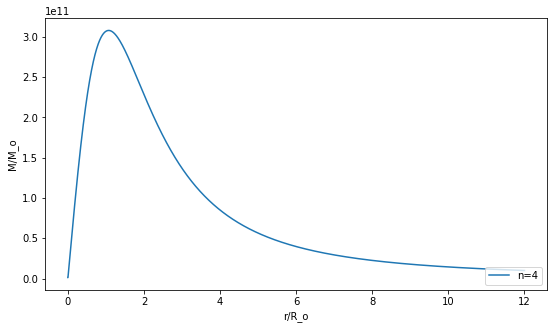

In [14]:
#plot the mass values for each n against radius
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(r_4, M_4, label = 'n=4')
#axis.set_ylim(0,1.0)
axis.set_ylabel('M/M_o')
axis.set_xlabel('r/R_o')
axis.legend(loc = 'lower right')
plt.show()

In [14]:
#G=4.785*10**(-7)
G=4.258*10**(4)
v=np.sqrt(G*M_sun/R)
v_0= np.sqrt(G*M_0/(xi_0))
v_1= np.sqrt(G*M_1/(xi_1))
v_2= np.sqrt(G*M_2/(xi_2))
v_3= np.sqrt(G*M_3/(xi_3))
v_4= np.sqrt(G*M_4/(xi_4))
v_5= np.sqrt(G*M_5/(xi_5))

print(v_0,r_0)

[9.37595849e-02 1.32596077e-01 1.87171307e-01 ... 1.31777525e+02
 1.31831389e+02 1.31885252e+02] [4.12580014e-04 8.21075077e-04 1.22957014e-03 ... 9.99183010e-01
 9.99591505e-01 1.00000000e+00]


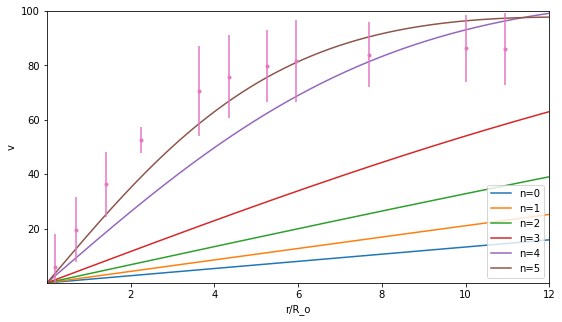

In [21]:
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(r_0*1e2, v_0, label = 'n=0')
axis.plot(r_1*1e2, v_1, label = 'n=1')
axis.plot(r_2*1e2, v_2, label = 'n=2')
axis.plot(r_3*1e2, v_3, label = 'n=3')
axis.plot(r_4*1e2, v_4, label = 'n=4')
axis.plot(r_5*1e2, v_5, label = 'n=5')
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")
axis.set_ylim(1e-2,1e2)
axis.set_xlim(2e-4,0.12e2)
axis.set_ylabel('v')
axis.set_xlabel('r/R_o')
axis.legend(loc = 'lower right')
plt.show()

### Pressure

Pressure: $$ P = K\rho^{\frac{n+1}{n}} = K\rho_c^{\frac{n+1}{n}}\theta^{n+1}$$

K: $$ \alpha = \sqrt{\frac{(n+1)K}{4\pi G\rho_c^{\frac{(n-1)}{n}}}} $$
$$ K = \frac{\alpha^{2}4\pi G\rho_c^{\frac{(n-1)}{n}}}{(n+1)} $$

Combining these 2 equations:
$$ P = \frac{\alpha^{2}4\pi G\rho_c^{2}\theta^{n+1}}{(n+1)} $$


In [18]:
#Value of the gravitational constant
G = 6.672e-11

#Input all variables into the combined equation for pressure for each value of n
P_0 = (alpha_0**2*4*np.pi*G*rho_c_0**2*theta_0**(0+1))/(0+1)
P_1 = (alpha_1**2*4*np.pi*G*rho_c_1**2*theta_1**(1+1))/(1+1)
P_2 = (alpha_2**2*4*np.pi*G*rho_c_2**2*theta_2**(2+1))/(2+1)
P_3 = (alpha_3**2*4*np.pi*G*rho_c_3**2*theta_3**(3+1))/(3+1)
P_4 = (alpha_4**2*4*np.pi*G*rho_c_4**2*theta_4**(4+1))/(4+1)
P_5 = (alpha_5**2*4*np.pi*G*rho_c_5**2*theta_5**(5+1))/(5+1)

#log these pressure values to make a better plot
logP_0 = np.log10(P_0)
logP_1 = np.log10(P_1)
logP_2 = np.log10(P_2)
logP_3 = np.log10(P_3)
logP_4 = np.log10(P_4)
logP_5 = np.log10(P_5)

C:\Users\namh2\AppData\Local\Temp/ipykernel_16364/3328349306.py:13: RuntimeWarning: invalid value encountered in log10
  logP_0 = np.log10(P_0)
C:\Users\namh2\AppData\Local\Temp/ipykernel_16364/3328349306.py:15: RuntimeWarning: invalid value encountered in log10
  logP_2 = np.log10(P_2)
C:\Users\namh2\AppData\Local\Temp/ipykernel_16364/3328349306.py:17: RuntimeWarning: invalid value encountered in log10
  logP_4 = np.log10(P_4)


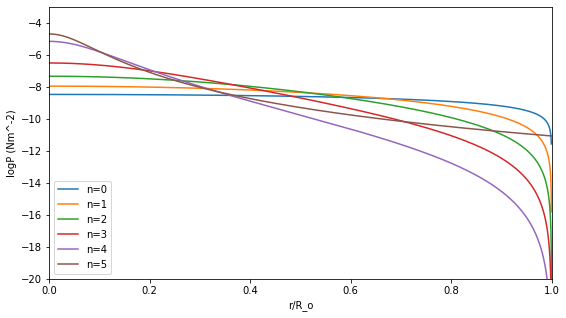

In [19]:
#plot the log of the pressure for each n value against radius
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(r_0, logP_0, label = 'n=0')
axis.plot(r_1, logP_1, label = 'n=1')
axis.plot(r_2, logP_2, label = 'n=2')
axis.plot(r_3, logP_3, label = 'n=3')
axis.plot(r_4, logP_4, label = 'n=4')
axis.plot(r_5, logP_5, label = 'n=5')
axis.set_ylim(-20,-3)
axis.set_xlim(0,1)
axis.set_ylabel('logP (Nm^-2)')
axis.set_xlabel('r/R_o')
axis.legend(loc = 'lower left')
plt.show()

### Temperature

Equate the equation of state of an ideal gas with the polytropic equation of state:

$$ P = \frac{kT\rho}{m_H\mu K} = K\rho_c^{\frac{(n+1)}{n}}\theta^{n+1}$$

Rearrange and substitute with density equation.

$$ T = \frac{m_H\mu K \rho_c^{\frac{1}{n}}\theta}{k} $$

Input the K equation:

$$ T = \frac{m_H\mu\alpha^{2}4\pi G\rho_c\theta}{k(n+1)} $$

In [20]:
#mass of hydrogen atom
m_H = 1.674e-27

#value of k (Boltzmann constant)
k = 1.381e-23

NameError: name 'r_ssm' is not defined

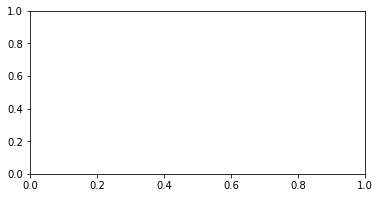

In [26]:
#to find the value of mu, plot it against each radius value to give a visual representation
fig, axis = plt.subplots(figsize = (6,3))
axis.plot(r_ssm, mu_ssm, 'k')
axis.set_ylabel('mu')
axis.set_xlabel('r/R_o')
plt.show()
#from this we can see the median mu value would be acceptable for most values of n (though it could have limitations towards the centre of the Sun)
print(np.median(mu_ssm))
mu = np.median(mu_ssm)

In [17]:
#Input variables into the T equation stated above
T_0 = (m_H*mu*alpha_0**2*4*np.pi*G*rho_c_0*theta_0)/(k*(0+1))
T_1 = (m_H*mu*(alpha_1**2)*4*np.pi*G*rho_c_1*theta_1)/(k*(1+1))
T_2 = (m_H*mu*(alpha_2**2)*4*np.pi*G*rho_c_2*theta_2)/(k*(2+1))
T_3 = (m_H*mu*(alpha_3**2)*4*np.pi*G*rho_c_3*theta_3)/(k*(3+1))
T_4 = (m_H*mu*(alpha_4**2)*4*np.pi*G*rho_c_4*theta_4)/(k*(4+1))
T_5 = (m_H*mu*(alpha_5**2)*4*np.pi*G*rho_c_5*theta_5)/(k*(5+1))

#log values of T to make for a more readable plot
logT_0 = np.log10(T_0)
logT_1 = np.log10(T_1)
logT_2 = np.log10(T_2)
logT_3 = np.log10(T_3)
logT_4 = np.log10(T_4)
logT_5 = np.log10(T_5)

/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10
/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10
/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10
/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10


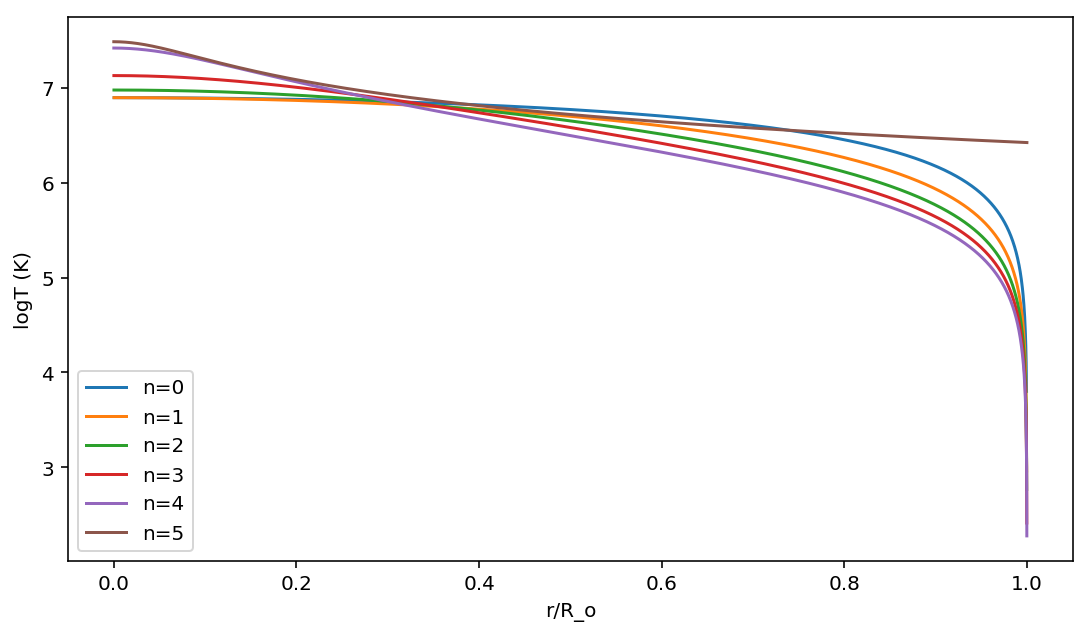

In [18]:
#plot log of temperature against radius
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(r_0, logT_0, label = 'n=0')
axis.plot(r_1, logT_1, label = 'n=1')
axis.plot(r_2, logT_2, label = 'n=2')
axis.plot(r_3, logT_3, label = 'n=3')
axis.plot(r_4, logT_4, label = 'n=4')
axis.plot(r_5, logT_5, label = 'n=5')
axis.set_ylabel('logT (K)')
axis.set_xlabel('r/R_o')
axis.legend(loc = 'lower left')
plt.show()

### Plotting

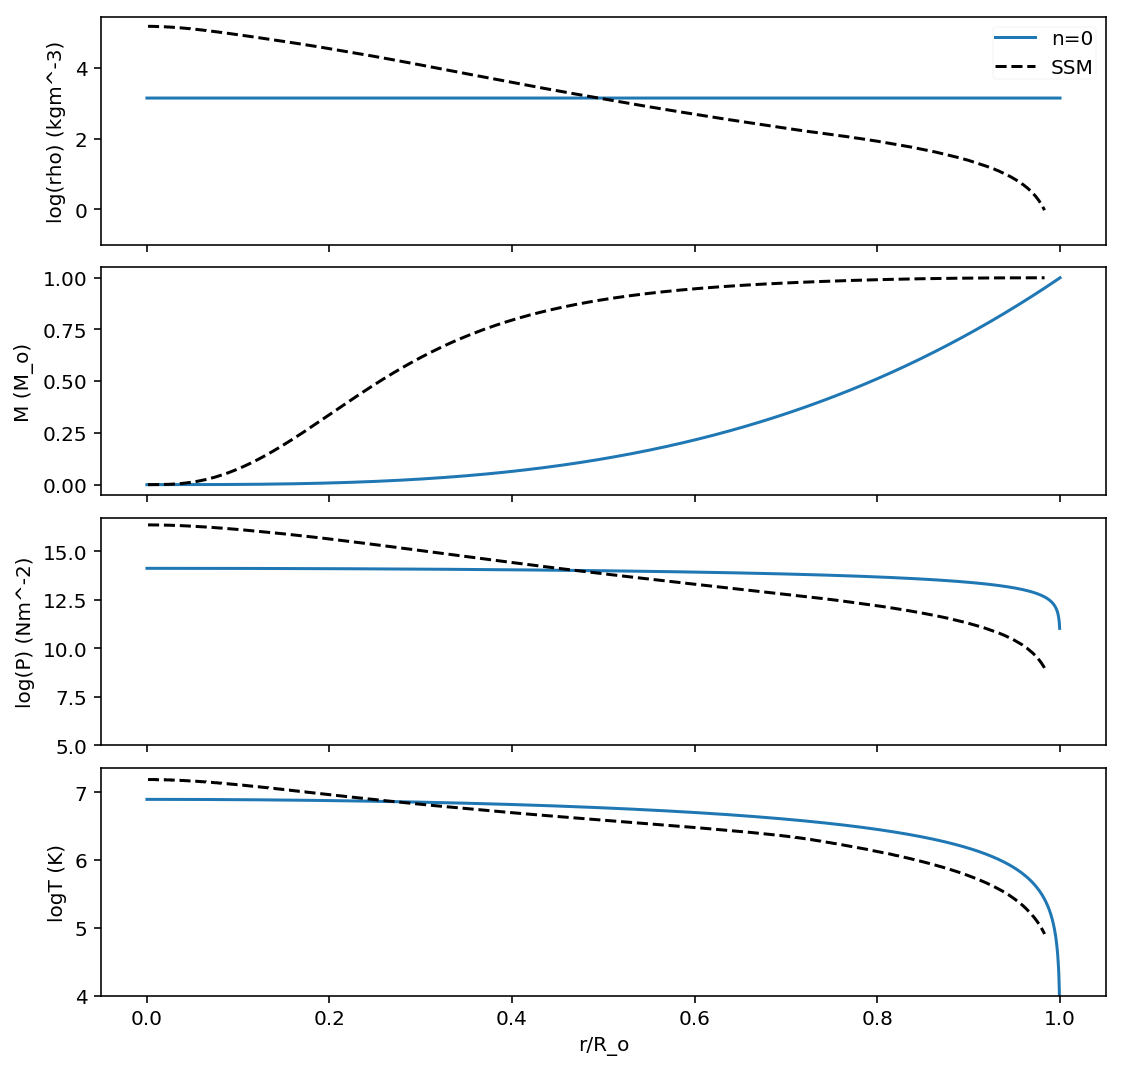

In [19]:
#plot each variable against radius for each n
#plot for n=0
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize = (9,9))
ax1.plot(r_0, log_rho_0, label = 'n=0')
ax1.plot(r_ssm, log_rho_ssm, 'k--', label = 'SSM')
ax1.set_ylabel('log(rho) (kgm^-3)')
ax1.set_ylim(-1,)
ax2.plot(r_0, M_0, label = 'n=0')
ax2.plot(r_ssm, m_ssm, 'k--', label = 'SSM')
ax2.set_ylabel('M (M_o)')
ax3.plot(r_0, logP_0, label = 'n=0')
ax3.plot(r_ssm, log_P_ssm, 'k--', label ='SSM')
ax3.set_ylabel('log(P) (Nm^-2)')
ax3.set_ylim(5,)
ax4.plot(r_0, logT_0, label = 'n=0')
ax4.plot(r_ssm, log_T_ssm, 'k--', label = 'SSM')
ax4.set_ylabel('logT (K)')
ax4.set_xlabel('r/R_o')
ax4.set_ylim(4,)

ax1.legend(framealpha = 0.1, borderpad = 0.1)
f.subplots_adjust(hspace=0.1)
plt.show()

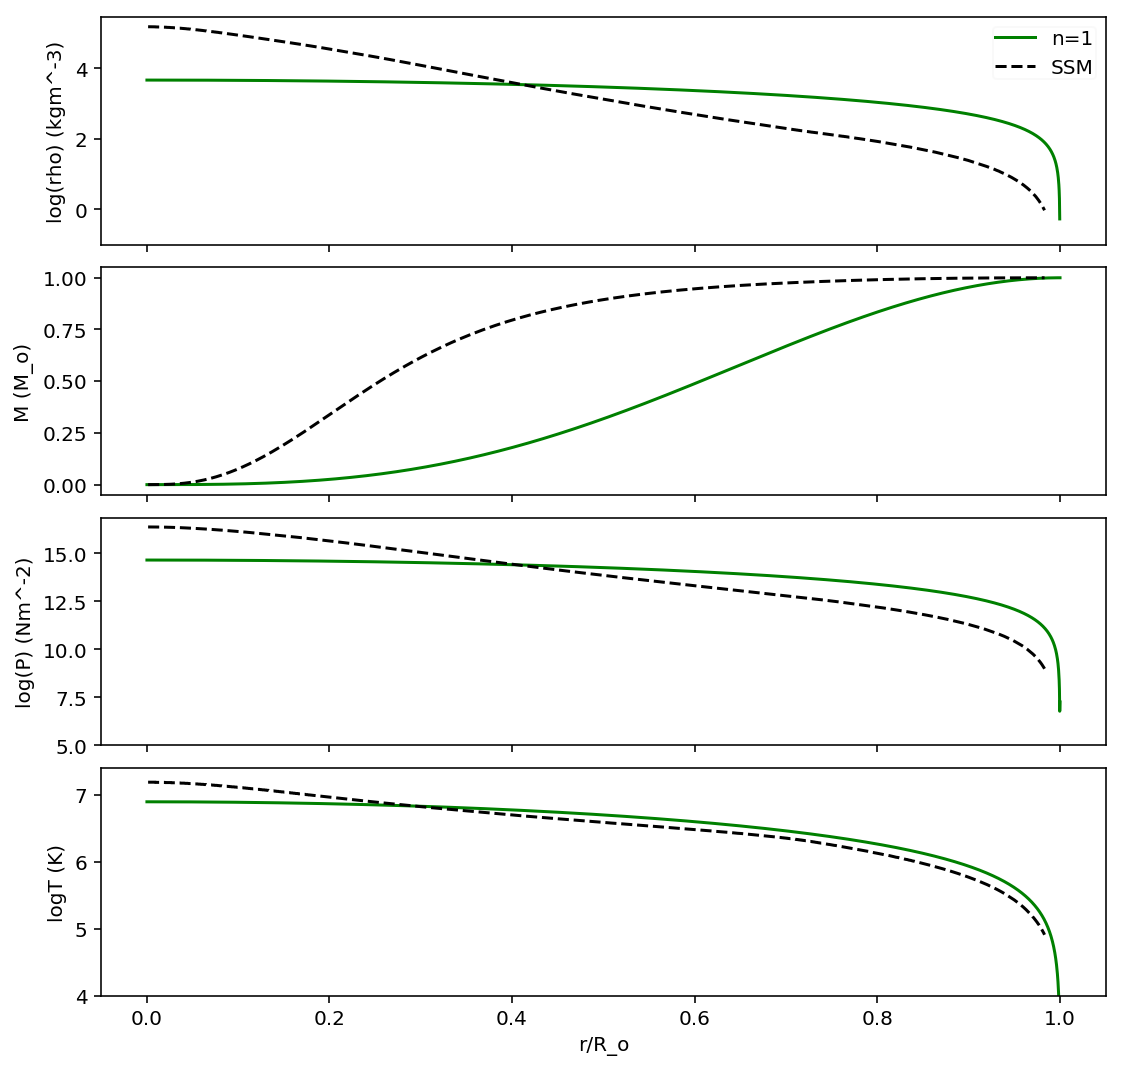

In [20]:
#plot each variable against radius for n=1
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize = (9,9))
ax1.plot(r_1, log_rho_1, 'g', label = 'n=1')
ax1.plot(r_ssm, log_rho_ssm, 'k--', label = 'SSM')
ax1.set_ylabel('log(rho) (kgm^-3)')
ax1.set_ylim(-1,)
ax2.plot(r_1, M_1, 'g', label = 'n=1')
ax2.plot(r_ssm, m_ssm, 'k--', label = 'SSM')
ax2.set_ylabel('M (M_o)')
ax3.plot(r_1, logP_1, 'g', label = 'n=1')
ax3.plot(r_ssm, log_P_ssm, 'k--', label ='SSM')
ax3.set_ylabel('log(P) (Nm^-2)')
ax3.set_ylim(5,)
ax4.plot(r_1, logT_1, 'g', label = 'n=1')
ax4.plot(r_ssm, log_T_ssm, 'k--', label = 'SSM')
ax4.set_ylabel('logT (K)')
ax4.set_xlabel('r/R_o')
ax4.set_ylim(4,)

ax1.legend(framealpha = 0.1, borderpad = 0.1)
f.subplots_adjust(hspace=0.1)
plt.show()

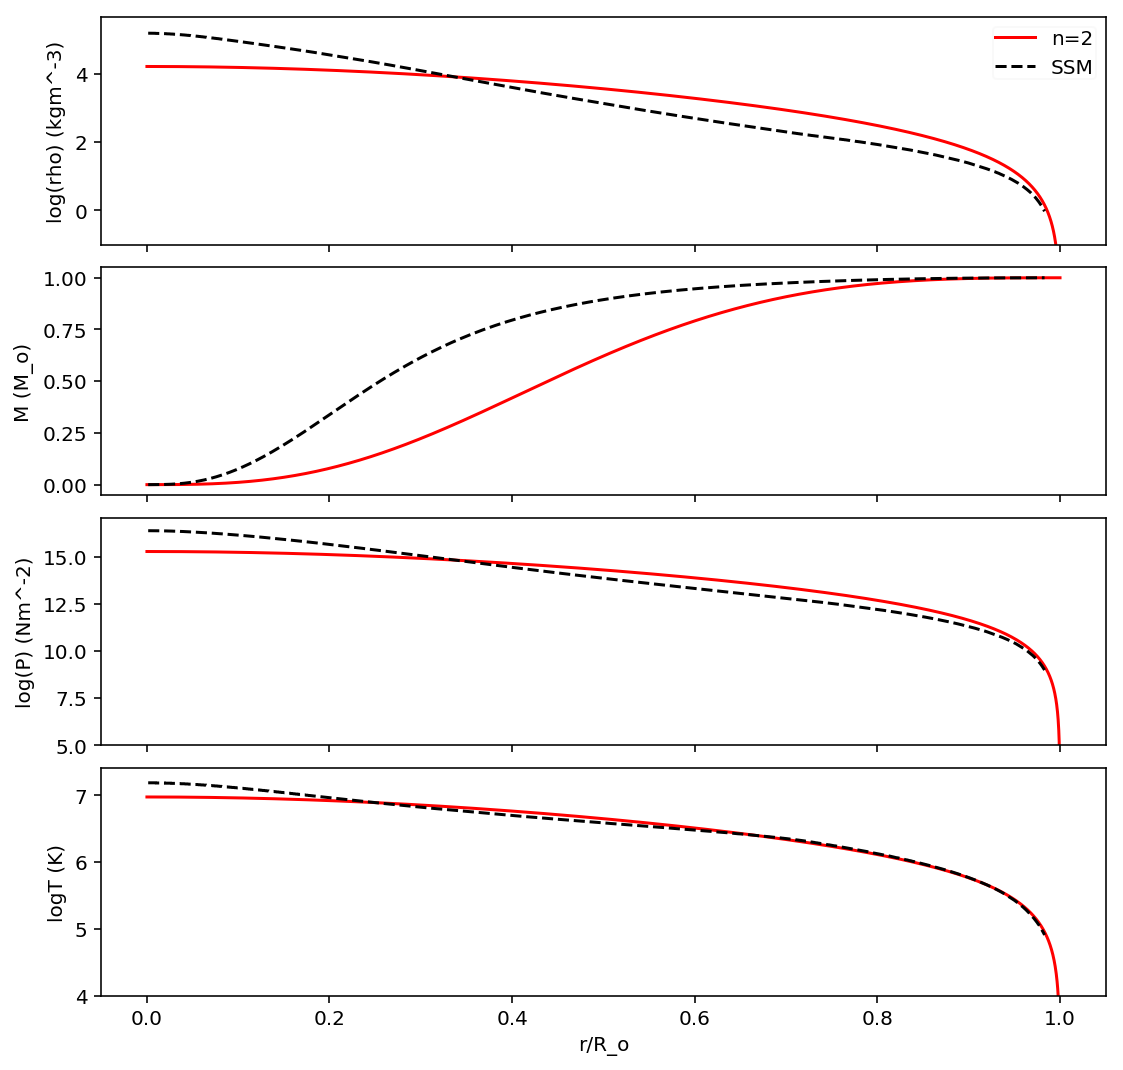

In [21]:
#plot the each variable against radius for n=2
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize = (9,9))
ax1.plot(r_2, log_rho_2, 'r', label = 'n=2')
ax1.plot(r_ssm, log_rho_ssm, 'k--', label = 'SSM')
ax1.set_ylabel('log(rho) (kgm^-3)')
ax1.set_ylim(-1,)
ax2.plot(r_2, M_2, 'r', label = 'n=2')
ax2.plot(r_ssm, m_ssm, 'k--', label = 'SSM')
ax2.set_ylabel('M (M_o)')
ax3.plot(r_2, logP_2, 'r', label = 'n=2')
ax3.plot(r_ssm, log_P_ssm, 'k--', label ='SSM')
ax3.set_ylabel('log(P) (Nm^-2)')
ax3.set_ylim(5,)
ax4.plot(r_2, logT_2, 'r', label = 'n=2')
ax4.plot(r_ssm, log_T_ssm, 'k--', label = 'SSM')
ax4.set_ylabel('logT (K)')
ax4.set_xlabel('r/R_o')
ax4.set_ylim(4,)

ax1.legend(framealpha = 0.1, borderpad = 0.1)
f.subplots_adjust(hspace=0.1)
plt.show()

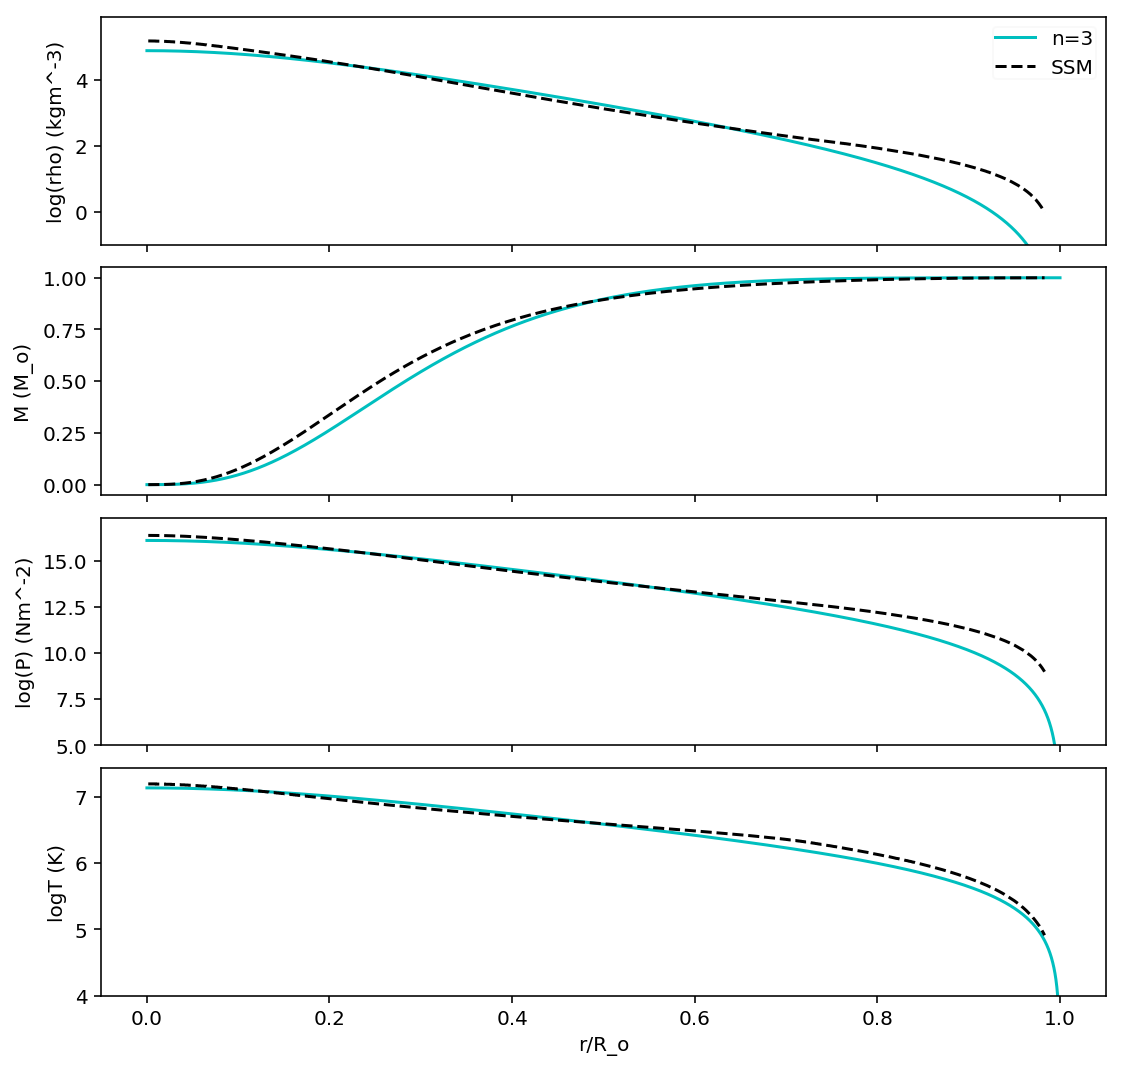

In [22]:
#plot each variable against radius for n=3
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize = (9,9))
ax1.plot(r_3, log_rho_3, 'c', label = 'n=3')
ax1.plot(r_ssm, log_rho_ssm, 'k--', label = 'SSM')
ax1.set_ylabel('log(rho) (kgm^-3)')
ax1.set_ylim(-1,)
ax2.plot(r_3, M_3, 'c', label = 'n=3')
ax2.plot(r_ssm, m_ssm, 'k--', label = 'SSM')
ax2.set_ylabel('M (M_o)')
ax3.plot(r_3, logP_3, 'c', label = 'n=3')
ax3.plot(r_ssm, log_P_ssm, 'k--', label ='SSM')
ax3.set_ylabel('log(P) (Nm^-2)')
ax3.set_ylim(5,)
ax4.plot(r_3, logT_3, 'c', label = 'n=3')
ax4.plot(r_ssm, log_T_ssm, 'k--', label = 'SSM')
ax4.set_ylabel('logT (K)')
ax4.set_xlabel('r/R_o')
ax4.set_ylim(4,)

ax1.legend(framealpha = 0.1, borderpad = 0.1)
f.subplots_adjust(hspace=0.1)
plt.show()

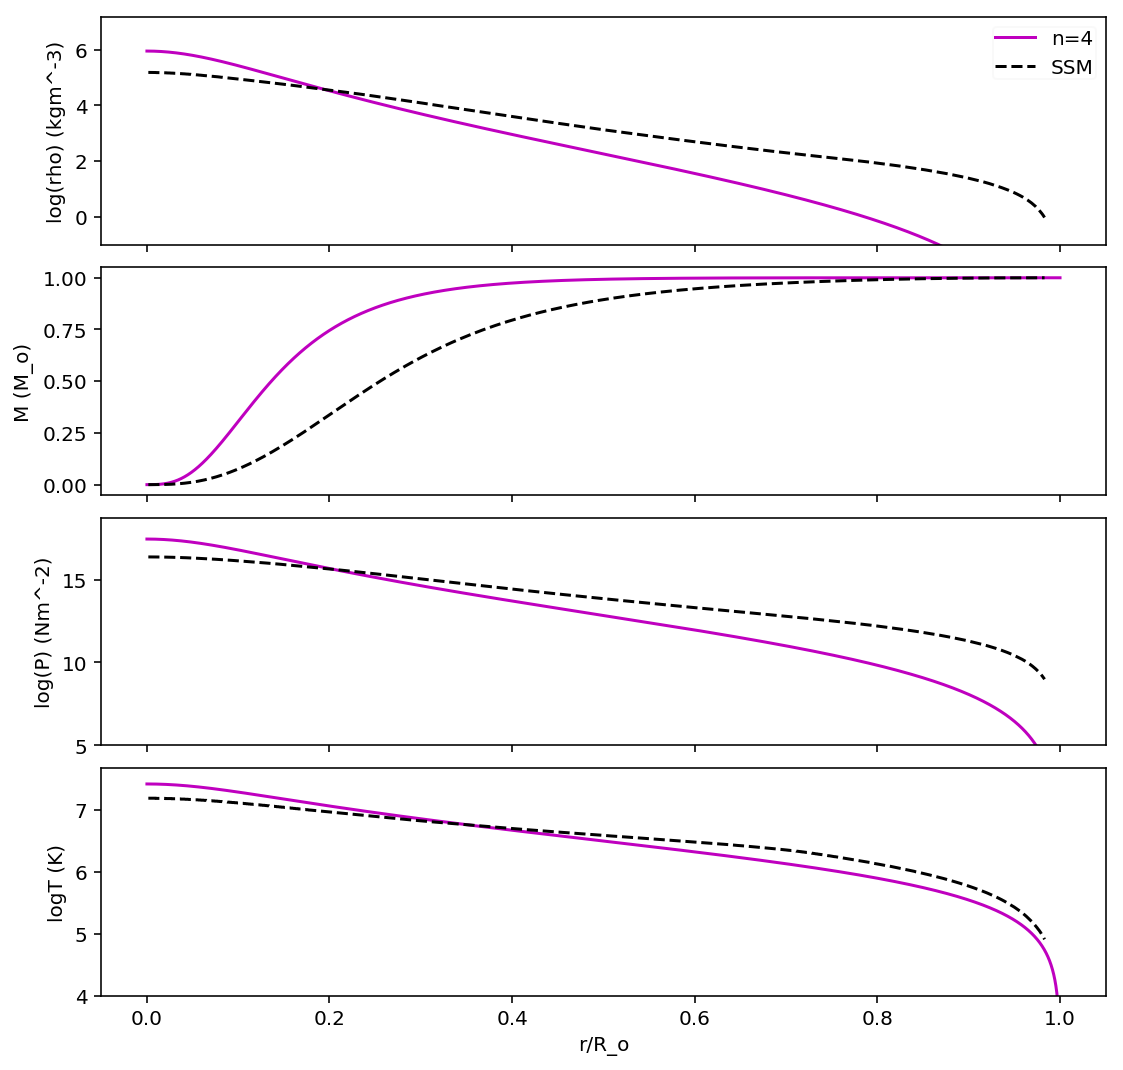

In [23]:
#plot each variable against radius for n=4
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize = (9,9))
ax1.plot(r_4, log_rho_4, 'm', label = 'n=4')
ax1.plot(r_ssm, log_rho_ssm, 'k--', label = 'SSM')
ax1.set_ylabel('log(rho) (kgm^-3)')
ax1.set_ylim(-1,)
ax2.plot(r_4, M_4, 'm', label = 'n=4')
ax2.plot(r_ssm, m_ssm, 'k--', label = 'SSM')
ax2.set_ylabel('M (M_o)')
ax3.plot(r_4, logP_4, 'm', label = 'n=4')
ax3.plot(r_ssm, log_P_ssm, 'k--', label ='SSM')
ax3.set_ylabel('log(P) (Nm^-2)')
ax3.set_ylim(5,)
ax4.plot(r_4, logT_4, 'm', label = 'n=4')
ax4.plot(r_ssm, log_T_ssm, 'k--', label = 'SSM')
ax4.set_ylabel('logT (K)')
ax4.set_xlabel('r/R_o')
ax4.set_ylim(4,)

ax1.legend(framealpha = 0.1, borderpad = 0.1)
f.subplots_adjust(hspace=0.1)
plt.show()

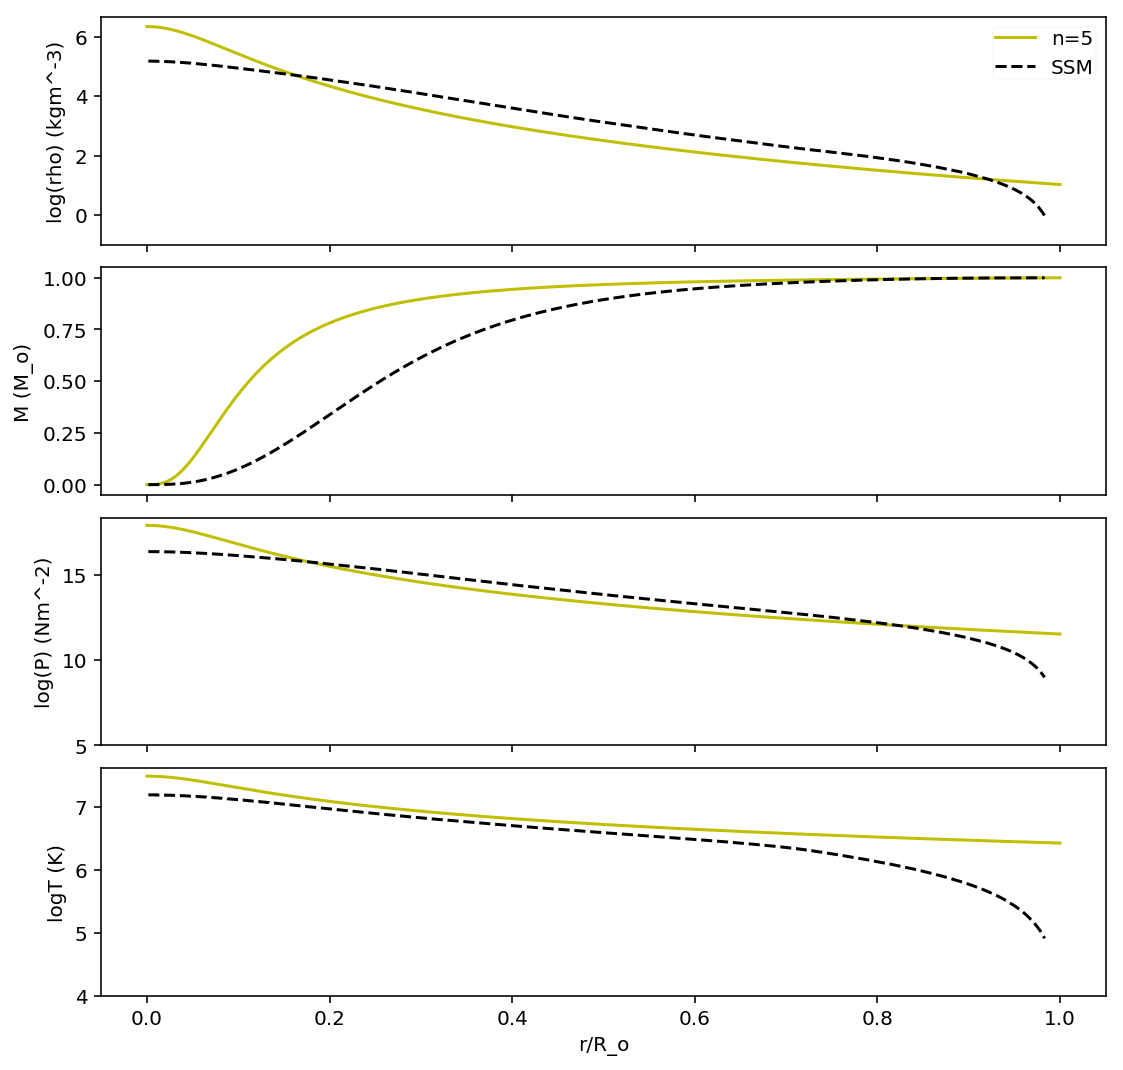

In [24]:
#plot each variable against radius for n=5
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize = (9,9))
ax1.plot(r_5, log_rho_5, 'y', label = 'n=5')
ax1.plot(r_ssm, log_rho_ssm, 'k--', label = 'SSM')
ax1.set_ylabel('log(rho) (kgm^-3)')
ax1.set_ylim(-1,)
ax2.plot(r_5, M_5, 'y', label = 'n=5')
ax2.plot(r_ssm, m_ssm, 'k--', label = 'SSM')
ax2.set_ylabel('M (M_o)')
ax3.plot(r_5, logP_5, 'y', label = 'n=5')
ax3.plot(r_ssm, log_P_ssm, 'k--', label ='SSM')
ax3.set_ylabel('log(P) (Nm^-2)')
ax3.set_ylim(5,)
ax4.plot(r_5, logT_5, 'y', label = 'n=5')
ax4.plot(r_ssm, log_T_ssm, 'k--', label = 'SSM')
ax4.set_ylabel('logT (K)')
ax4.set_xlabel('r/R_o')
ax4.set_ylim(4,)

ax1.legend(framealpha = 0.1, borderpad = 0.1)
f.subplots_adjust(hspace=0.1)
plt.show()

From the above figures it can be seen that the n=3 polytrope is the best fit to the standard solar model, more analysis of the data can be found in the report.

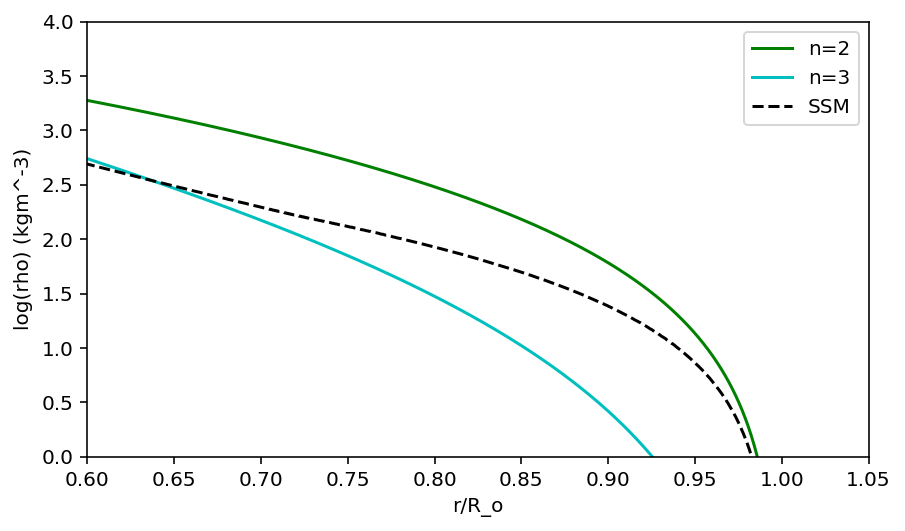

In [25]:
#zoom in the plot for density for n=2 & 3 polytropes, to show clear relationship
fig, axis = plt.subplots(figsize = (7,4))
axis.plot(r_2, log_rho_2, label = 'n=2', color='g')
axis.plot(r_3, log_rho_3, label = 'n=3', color='c')
axis.plot(r_ssm, log_rho_ssm, 'k--', label = 'SSM')
axis.set_ylim(0, 4)
axis.set_xlim(0.6,)
axis.set_ylabel('log(rho) (kgm^-3)')
axis.set_xlabel('r/R_o')
axis.legend()
plt.show()

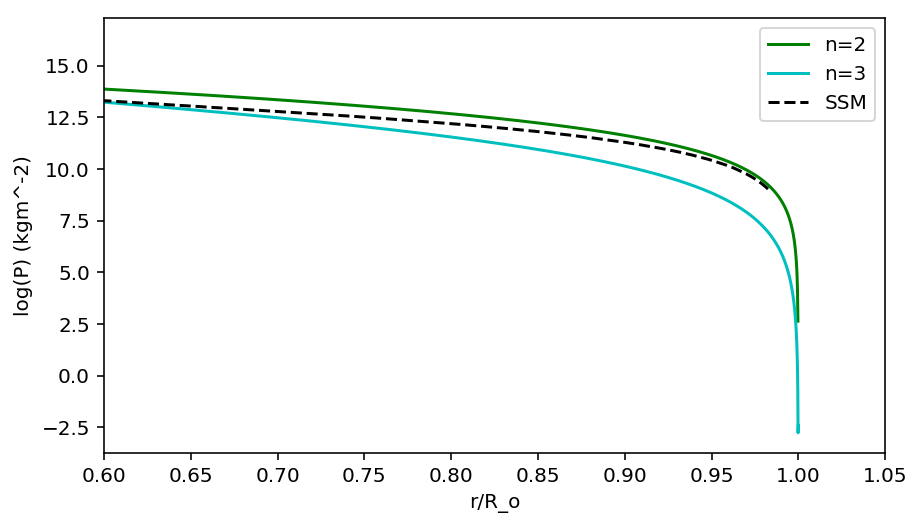

In [26]:
#zoom in the plot for pressure for n=2 & 3 polytropes, to show clear relationship
fig, axis = plt.subplots(figsize = (7,4))
axis.plot(r_2, logP_2, label = 'n=2', color='g')
axis.plot(r_3, logP_3, label = 'n=3', color='c')
axis.plot(r_ssm, log_P_ssm, 'k--', label = 'SSM')
axis.set_ylim()
axis.set_xlim(0.6,)
axis.set_ylabel('log(P) (kgm^-2)')
axis.set_xlabel('r/R_o')
axis.legend()
plt.show()

In [27]:
#find values of each variable at the centre and surface of the Sun using slicing for n=0
print'central density n=0:', rho_0[0]
print'surface density n=0:', rho_0[-1]
print'central mass n=0:', M_0[0]
print'surface mass n=0:', M_0[-1]
print'central pressure n=0:', P_0[0]
print'surface pressure n=0:', P_0[-1]
print'central temperature n=0:', T_0[0]
print'surface temperature n=0:', T_0[-1]

central density n=0: 1409.6224013661824
surface density n=0: 1409.6224013661824
central mass n=0: 2.085196890921245e-10
surface mass n=0: 0.9999999999999996
central pressure n=0: 134551543657213.67
surface pressure n=0: -2219201009.021052
central temperature n=0: 7896785.156978242
surface temperature n=0: -130.24416600551606


In [28]:
#find values of each variable at the centre and surface of the Sun using slicing for n=1
print'central density n=1:', rho_1[0]
print'surface density n=1:', rho_1[-1]
print'central mass n=1:', M_1[0]
print'surface mass n=1:', M_1[-1]
print'central pressure n=1:', P_1[0]
print'surface pressure n=1:', P_1[-1]
print'central temperature n=1:', T_1[0]
print'surface temperature n=1:', T_1[-1]

central density n=1: 4640.393479871425
surface density n=1: -0.9391604491021224
central mass n=1: 3.2496091098874176e-10
surface mass n=1: 1.0
central pressure n=1: 442844127970057.06
surface pressure n=1: 18139314.23118434
central temperature n=1: 7895152.321344089
surface temperature n=1: -1597.884927648124


In [29]:
#find values of each variable at the centre and surface of the Sun using slicing for n=2
print'central density n=2:', rho_2[0]
print'surface density n=2:', rho_2[-1]
print'central mass n=2:', M_2[0]
print'surface mass n=2:', M_2[-1]
print'central pressure n=2:', P_2[0]
print'surface pressure n=2:', P_2[-1]
print'central temperature n=2:', T_2[0]
print'surface temperature n=2:', T_2[-1]

central density n=2: 16092.908044829437
surface density n=2: 6.952243848535457e-05
central mass n=2: 4.2339940396405507e-10
surface mass n=2: 1.0000000000000002
central pressure n=2: 1848752684800063.0
surface pressure n=2: -524.9458634614224
central temperature n=2: 9504050.138644136
surface temperature n=2: -624.6747506957851


In [30]:
#find values of each variable at the centre and surface of the Sun using slicing for n=3
print'central density n=3:', rho_3[0]
print'surface density n=3:', rho_3[-1]
print'central mass n=3:', M_3[0]
print'surface mass n=3:', M_3[-1]
print'central pressure n=3:', P_3[0]
print'surface pressure n=3:', P_3[-1]
print'central temperature n=3:', T_3[0]
print'surface temperature n=3:', T_3[-1]

central density n=3: 76561.0741050157
surface density n=3: -9.593438873378746e-10
central mass n=3: 5.057594412168205e-10
surface mass n=3: 1.0000000000000002
central pressure n=3: 1.2490142139297048e+16
surface pressure n=3: 0.003635150874981288
central temperature n=3: 13496581.881126745
surface temperature n=3: -313.48196386374104


In [31]:
#find values of each variable at the centre and surface of the Sun using slicing for n=4
print'central density n=4:', rho_4[0]
print'surface density n=4:', rho_4[-1]
print'central mass n=4:', M_4[0]
print'surface mass n=4:', M_4[-1]
print'central pressure n=4:', P_4[0]
print'surface pressure n=4:', P_4[-1]
print'central temperature n=4:', T_4[0]
print'surface temperature n=4:', T_4[-1]

central density n=4: 881912.540230316
surface density n=4: 3.95630100226574e-19
central mass n=4: 5.678643458752823e-10
surface mass n=4: 1.0000000000000002
central pressure n=4: 2.808113010443602e+17
surface pressure n=4: -1.0309659968824032e-13
central temperature n=4: 26342288.05137631
surface temperature n=4: -21.558544987223293


In [32]:
#find values of each variable at the centre and surface of the Sun using slicing for n=5
print'central density n=5:', rho_5[0]
print'surface density n=5:', rho_5[-1]
print'central mass n=5:', M_5[0]
print'surface mass n=5:', M_5[-1]
print'central pressure n=5:', P_5[0]
print'surface pressure n=5:', P_5[-1]
print'central temperature n=5:', T_5[0]
print'surface temperature n=5:', T_5[-1]

central density n=5: 2195902.9241341255
surface density n=5: 10.582294117181593
central mass n=5: 5.956738137340104e-10
surface mass n=5: 0.9999999999999999
central pressure n=5: 8.153165227918121e+17
surface pressure n=5: 339536347569.56964
central temperature n=5: 30716910.857173055
surface temperature n=5: 2654427.545914755


In [33]:
#find values of each variable at the centre and surface of the Sun using slicing for the SSM
print'central density SSM:', rho_ssm[0]
print'surface density SSM:', rho_ssm[-1]
print'central mass SSM:', m_ssm[0]
print'surface mass SSM:', m_ssm[-1]
print'central pressure SSM:', P_ssm[0]
print'surface pressure SSM:', P_ssm[-1]
print'central temperature SSM:', T_ssm[0]
print'surface temperature SSM:', T_ssm[-1]

central density SSM: 151000.0
surface density SSM: 0.9460000000000001
central mass SSM: 4e-07
surface mass SSM: 0.9999897
central pressure SSM: 2.34e+16
surface pressure SSM: 970000000.0
central temperature SSM: 15500000.0
surface temperature SSM: 81200.0
